### Library

In [24]:
import os
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter


In [11]:
image_path = "./DUTS/DUTS-TE/DUTS-TE-Image"
mask_path = "./DUTS/DUTS-TE/DUTS-TE-Mask"

images = os.listdir(image_path)
masks = os.listdir(mask_path)

print(f"Number of images: {len(images)}")
print(f"Number of masks: {len(masks)}")

not_missing_masks = [img for img in images if img in masks]
if not_missing_masks:
    print(f"Missing masks for {len(not_missing_masks)} images.")
else:
    print("All images have corresponding masks.")

Number of images: 5019
Number of masks: 5019
All images have corresponding masks.


### Check file format

In [12]:
image_formats = {os.path.splitext(file)[1] for file in images}
mask_formats = {os.path.splitext(file)[1] for file in masks}
print(f"Image formats: {image_formats}")
print(f"Mask formats: {mask_formats}")

Image formats: {'.jpg'}
Mask formats: {'.png'}


### Image and Mask Dimensions

In [13]:
print("\nSample Image and Mask Dimensions:")
for i in range(min(5, len(images))):  
    img = Image.open(os.path.join(image_path, images[i]))
    mask = Image.open(os.path.join(mask_path, masks[i]))
    print(f"Image {images[i]}: {img.size}, Mode: {img.mode}")
    print(f"Mask {masks[i]}: {mask.size}, Mode: {mask.mode}")


Sample Image and Mask Dimensions:
Image ILSVRC2012_test_00000003.jpg: (400, 302), Mode: RGB
Mask ILSVRC2012_test_00000003.png: (400, 302), Mode: L
Image ILSVRC2012_test_00000023.jpg: (400, 300), Mode: RGB
Mask ILSVRC2012_test_00000023.png: (400, 300), Mode: L
Image ILSVRC2012_test_00000025.jpg: (400, 300), Mode: RGB
Mask ILSVRC2012_test_00000025.png: (400, 300), Mode: L
Image ILSVRC2012_test_00000026.jpg: (323, 400), Mode: RGB
Mask ILSVRC2012_test_00000026.png: (323, 400), Mode: L
Image ILSVRC2012_test_00000034.jpg: (342, 400), Mode: RGB
Mask ILSVRC2012_test_00000034.png: (342, 400), Mode: L


### Display an image and mask

In [6]:
sample_image = Image.open(os.path.join(image_path, images[1]))
sample_mask = Image.open(os.path.join(mask_path, masks[1]))

sample_image.show() 
sample_mask.show() 


### Analyze pixel values in masks

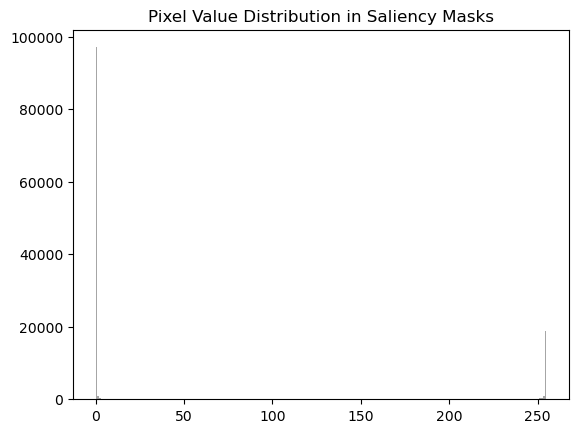

In [5]:
mask_array = np.array(sample_mask)
plt.hist(mask_array.ravel(), bins=256, color='gray', alpha=0.7)
plt.title("Pixel Value Distribution in Saliency Masks")
plt.show()

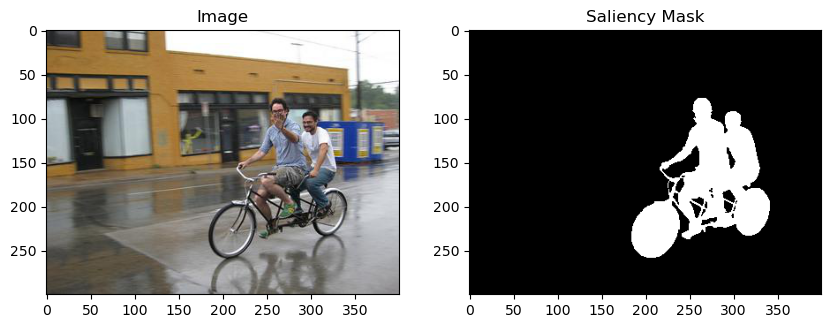

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(sample_image)
ax[0].set_title("Image")
ax[1].imshow(sample_mask, cmap='gray')
ax[1].set_title("Saliency Mask")
plt.show()

### Compute average dimensions 

In [25]:
use_sample = True 
sample_size = 1000
if use_sample:
    sample_indices = random.sample(range(len(images)), sample_size)
    images = [images[i] for i in sample_indices]
    masks = [masks[i] for i in sample_indices]

total_width, total_height = 0, 0
salient_area_ratios = []
unique_pixel_values = Counter()

print("Processing images and masks...")
for img_file, mask_file in tqdm(zip(images, masks), total=len(images)):
    img = Image.open(os.path.join(image_path, img_file))
    mask = Image.open(os.path.join(mask_path, mask_file))

    total_width += img.width
    total_height += img.height

    mask_array = np.array(mask, dtype=np.uint8) 
    unique_pixel_values.update(mask_array.ravel())

    non_zero_pixels = np.count_nonzero(mask_array)
    total_pixels = mask_array.size
    salient_area_ratios.append(non_zero_pixels / total_pixels)

avg_width = total_width / len(images)
avg_height = total_height / len(images)
avg_salient_area = np.mean(salient_area_ratios) * 100
std_salient_area = np.std(salient_area_ratios) * 100

print("\nDataset Statistics:")
print(f"Number of Images: {len(images)}")
print(f"Average Image Dimensions: {avg_width:.2f} x {avg_height:.2f}")


Processing images and masks...


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:47<00:00, 20.94it/s]


Dataset Statistics:
Number of Images: 1000
Average Image Dimensions: 382.99 x 322.03


### Unique pixel values in masks

In [26]:
print(f"Unique Pixel Values in Masks: {sorted(unique_pixel_values.keys())}")

Unique Pixel Values in Masks: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

### Average and standard deviation of salient coverage

In [27]:
print(f"Average Salient Area Coverage: {avg_salient_area:.2f}%")
print(f"Standard Deviation of Salient Coverage: {std_salient_area:.2f}%")

Average Salient Area Coverage: 15.60%
Standard Deviation of Salient Coverage: 14.19%


### Detecting outlier

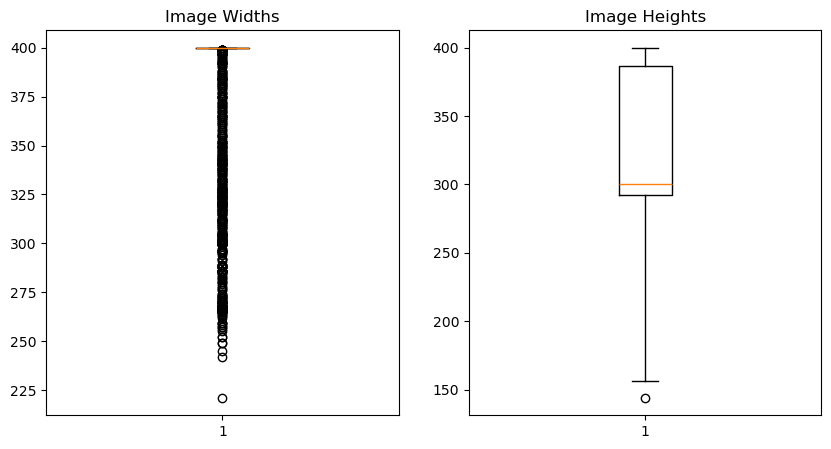

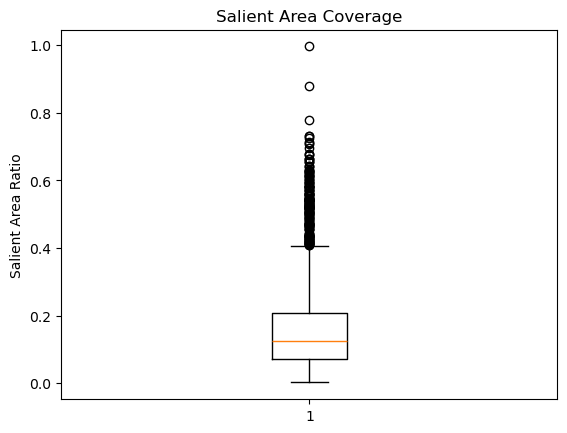

In [19]:
# Boxplot for dimensions
dimensions = [(Image.open(os.path.join(image_path, img)).size) for img in images]
widths, heights = zip(*dimensions)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(widths)
plt.title('Image Widths')
plt.subplot(1, 2, 2)
plt.boxplot(heights)
plt.title('Image Heights')
plt.show()

# Boxplot for salient area coverage
plt.boxplot(salient_area_ratios)
plt.title('Salient Area Coverage')
plt.ylabel('Salient Area Ratio')
plt.show()


### Overlay

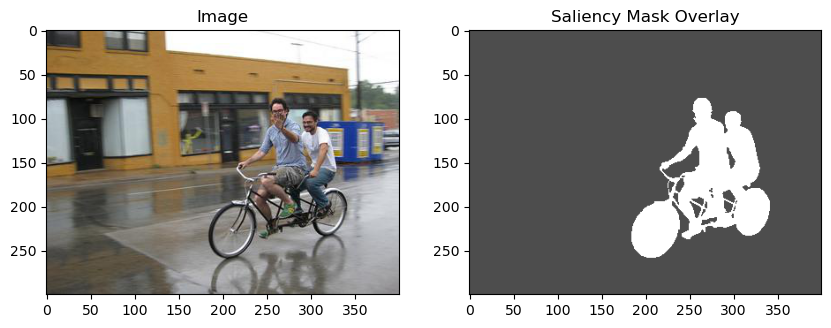

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap='gray', alpha=0.7)
plt.title("Saliency Mask Overlay")
plt.show()

100%|██████████| 1000/1000 [00:07<00:00, 142.49it/s]


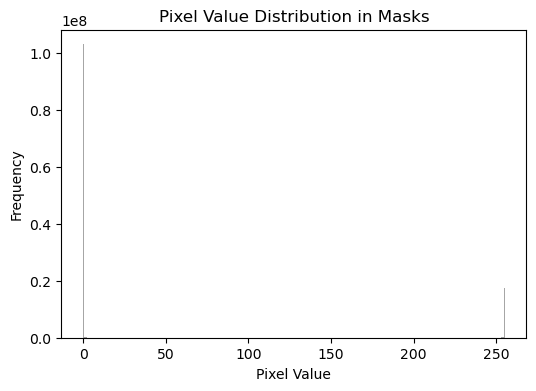

In [35]:
# Initialize an empty histogram for pixel intensities (256 bins for 0-255 range)
pixel_histogram = np.zeros(256, dtype=np.int64)

# Incrementally update the histogram by processing masks one by one
for mask_file in tqdm(masks):
    mask = Image.open(os.path.join(mask_path, mask_file))
    mask_array = np.array(mask, dtype=np.uint8)  # Convert to uint8 to limit memory usage
    unique, counts = np.unique(mask_array, return_counts=True)
    for u, c in zip(unique, counts):
        pixel_histogram[u] += c

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.bar(range(256), pixel_histogram, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution in Masks')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
